In [2]:
# Specify the input year range and which beta to use for generating plots
AMOC_range = 140
best_para = 0.1

In [3]:
path_str = 'AMOC_'+str(AMOC_range)+'_years/'
print(path_str)

# input data load path
input_file = 'input_data/'+path_str

# model output load path
load_file = '../model_output/'+path_str+'beta_'+str(best_para)+'/'
# load_file = '../model_output/'+path_str+'new_seed_0/'+'beta_'+str(best_para)+'/'

# plots saving path
save_file = 'plots/'+path_str+'beta_'+str(best_para)+'/'
# save_file = 'plots/'+path_str+'new_seed_0/'+'beta_'+str(best_para)+'/'

AMOC_140_years/


In [5]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from scipy.stats import norm, multivariate_normal

from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KernelDensity
from sklearn import linear_model
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [6]:
# print(os.getcwd())

In [7]:
# matplotlib.__version__

In [8]:
# load data
AMOC_Obs = pd.read_csv(input_file+'dtdata_AMOC_Obs.csv', index_col = 0)
AMOCindex_Obs = pd.read_csv(input_file+'dtdata_AMOCindex_Obs.csv', index_col = 0)

print('AMOC observation data shape:', AMOC_Obs.shape)
print('AMOC index observation data shape:', AMOCindex_Obs.shape)

AMOC observation data shape: (1680, 2)
AMOC index observation data shape: (1680, 2)


In [9]:
Obs_pred = np.load(load_file + 'Obs_pred.npy')

emp_prob = np.load(load_file + 'emp_prob.npy')
test_bias = np.load(load_file + 'test_bias.npy')

[]

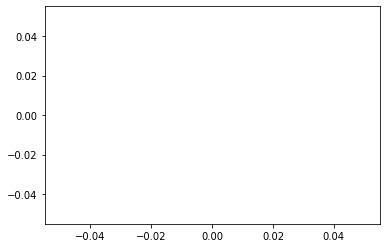

In [10]:
# change font size plt, need to run two times for old version matplotlib :)

# check: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams for systematically change plot format
# font = {'size': 12}
plt.rcParams.update({'font.size':16, 'legend.fontsize':12})
plt.plot()

[]

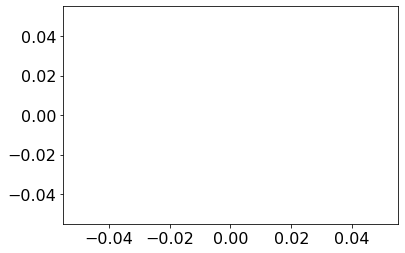

In [11]:
plt.rcParams.update({'font.size':16, 'legend.fontsize':12})
plt.plot()

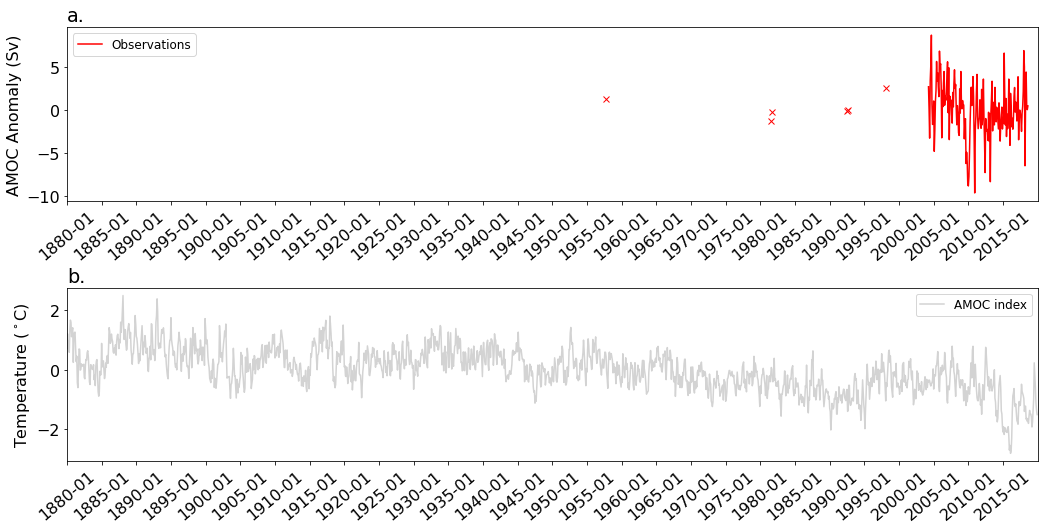

In [11]:
### Plot Obs data: AMOC and AMOC Index

AMOC = AMOC_Obs.loc[~AMOC_Obs['Obs'].isna(), 'Obs']
AMOC = AMOC - AMOC.mean()

AMOC_index = AMOCindex_Obs['Obs']
AMOC_index = AMOC_index - AMOC_index.mean()

foo = plt.figure(figsize=(15, 7))
plt.tight_layout()
# AMOC plot
plt.subplot(2, 1, 1)
plt.tight_layout(pad = 2)
for i in range(6):
    plt.plot(AMOC.index[i], AMOC.values[i], c='red', marker='x')
plt.plot(AMOC.index[6:], AMOC.values[6:], c='red', label='Observations')
# xticks for every 10 years
xlocs=np.arange(0, len(AMOC_Obs), step=60)
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=40)
plt.xlim((0, len(AMOC_Obs)))
plt.ylabel('AMOC Anomaly (Sv)')
plt.title('a.', loc = 'left')
plt.legend()

# AMOC index plot
plt.subplot(2, 1, 2)
plt.plot(AMOC_index, c='lightgray', label='AMOC index')
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=40)
plt.xlim((0, len(AMOC_Obs)))
plt.ylabel('Temperature ($^\circ$C)')
plt.title('b.', loc = 'left')
plt.legend()

plt.subplots_adjust(hspace=0.5)

# foo.savefig(save_file + 'Obs.png', bbox_inches='tight')

In [12]:
# # Get some example for testing data set###

# # l = [400, 600, 1000, 1700, 3000, 10000]
# l = [0, 1000, 4000, 8000, 10000]

# for i in l:
#     test_pred_1000 = np.load(load_file + 'test_pred_' + str(i) + '.npy')
#     AMOC_input_test = np.load(load_file + 'AMOC_input_test_' + str(i) + '.npy')
#     AMOCindex_input_test = np.load(load_file + 'AMOCindex_input_test_' + str(i) + '.npy')
#     target_test = np.load(load_file + 'target_test_' + str(i) + '.npy')
    
#     test_pred_1000 = np.squeeze(test_pred_1000)
#     AMOC_input_test = np.squeeze(AMOC_input_test)
#     AMOCindex_input_test = np.squeeze(AMOCindex_input_test)
#     target_test = np.squeeze(target_test)
    
#     ### confidence interval ###
#     test_pred_1000 = np.squeeze(test_pred_1000)
#     mean = np.mean(test_pred_1000, axis=0)
#     std = np.std(test_pred_1000, axis=0)
#     x = np.linspace(1, test_pred_1000.shape[1], test_pred_1000.shape[1])
#     ci = 1.96 * std
    
#     mask = np.array(~AMOC_Obs['Obs'].isna())

#     foo = plt.figure(figsize=(15, 5))
#     plt.subplot(2, 1, 1)
#     plt.tight_layout(pad = 2)
#     for j in range(6):
#         plt.plot(x[mask][j], AMOC_input_test[j], c='red', marker='x')
#     plt.plot(x[mask][6:], AMOC_input_test[6:], c='red', label='Observations')
#     plt.plot(target_test, c='blue', label='True mean trend')
#     plt.plot(mean, c='orange', label='Estimated mean trend')
#     plt.fill_between(x, (mean-ci), (mean+ci), color='navy', alpha=.2)
#     plt.ylabel(r'AMOC [Strength (Sv)]')
#     plt.legend()
    
#     plt.subplot(2, 1, 2)
#     plt.plot(AMOCindex_input_test, c='lightgray', label='AMOC index')
#     plt.ylabel('Temperature ($^\circ$C)')
#     plt.legend()

# #     foo.savefig(save_file + str(i) +'.png', bbox_inches='tight')

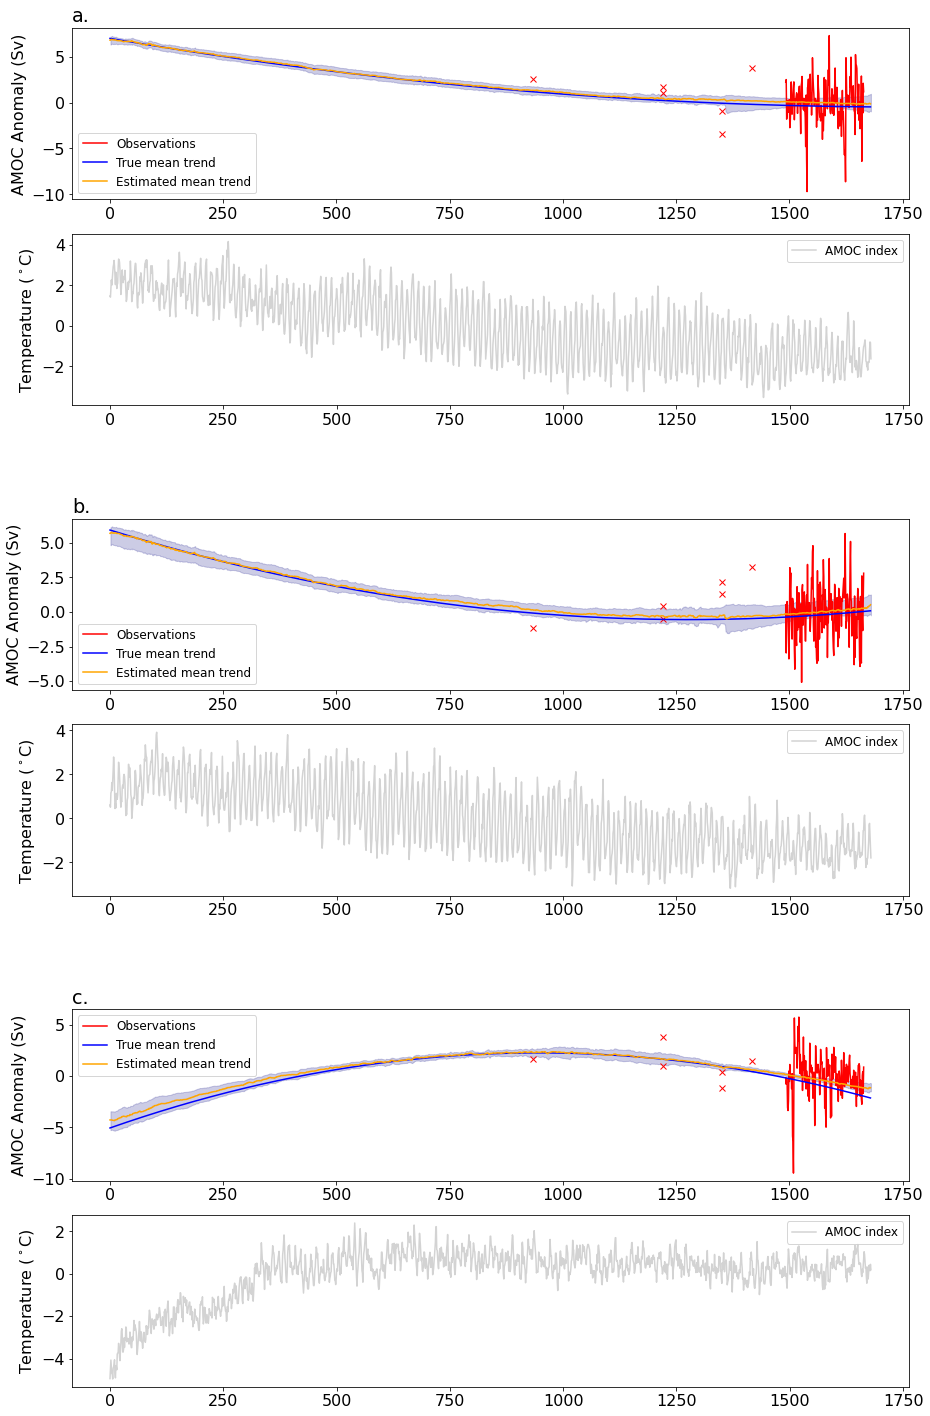

In [12]:
l = [0, 4000, 10000]
legend = ['a', 'b', 'c']

fig = plt.figure(figsize=(15, 25))
outer = gridspec.GridSpec(len(l), 1, hspace = 0.3)

for i, case in enumerate(l):
    test_pred_1000 = np.load(load_file + 'test_pred_' + str(case) + '.npy')
    AMOC_input_test = np.load(load_file + 'AMOC_input_test_' + str(case) + '.npy')
    AMOCindex_input_test = np.load(load_file + 'AMOCindex_input_test_' + str(case) + '.npy')
    target_test = np.load(load_file + 'target_test_' + str(case) + '.npy')
    
    test_pred_1000 = np.squeeze(test_pred_1000)
    AMOC_input_test = np.squeeze(AMOC_input_test)
    AMOCindex_input_test = np.squeeze(AMOCindex_input_test)
    target_test = np.squeeze(target_test)
    
    ### confidence interval ###
    test_pred_1000 = np.squeeze(test_pred_1000)
    mean = np.mean(test_pred_1000, axis=0)
    lower = np.quantile(test_pred_1000, 0.025, axis = 0)
    upper = np.quantile(test_pred_1000, 0.975, axis = 0)
#     std = np.std(test_pred_1000, axis=0)
#     ci = 1.96 * std
    x = np.linspace(1, test_pred_1000.shape[1], test_pred_1000.shape[1])
    
    mask = np.array(~AMOC_Obs['Obs'].isna())
    
    ax1 = plt.Subplot(fig, outer[i])
    fig.add_subplot(ax1)
    ax1.axis('off')
    ax1.set_title(legend[i]+'.', loc = 'left')
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], hspace=0.2)
    
    ax = fig.add_subplot(inner[0])
    for j in range(6):
        ax.plot(x[mask][j], AMOC_input_test[j], c='red', marker='x')
    ax.plot(x[mask][6:], AMOC_input_test[6:], c='red', label='Observations')
    ax.plot(target_test, c='blue', label='True mean trend')
    ax.plot(mean, c='orange', label='Estimated mean trend')
    ax.fill_between(x, lower, upper, color='navy', alpha=.2)
    ax.set_ylabel('AMOC Anomaly (Sv)')
    ax.legend()
    
    ax = fig.add_subplot(inner[1])
    ax.plot(AMOCindex_input_test, c='lightgray', label='AMOC index')
    ax.set_ylabel('Temperature ($^\circ$C)')
    ax.legend()
    
# fig.savefig(save_file + 'test_case.png', bbox_inches='tight')

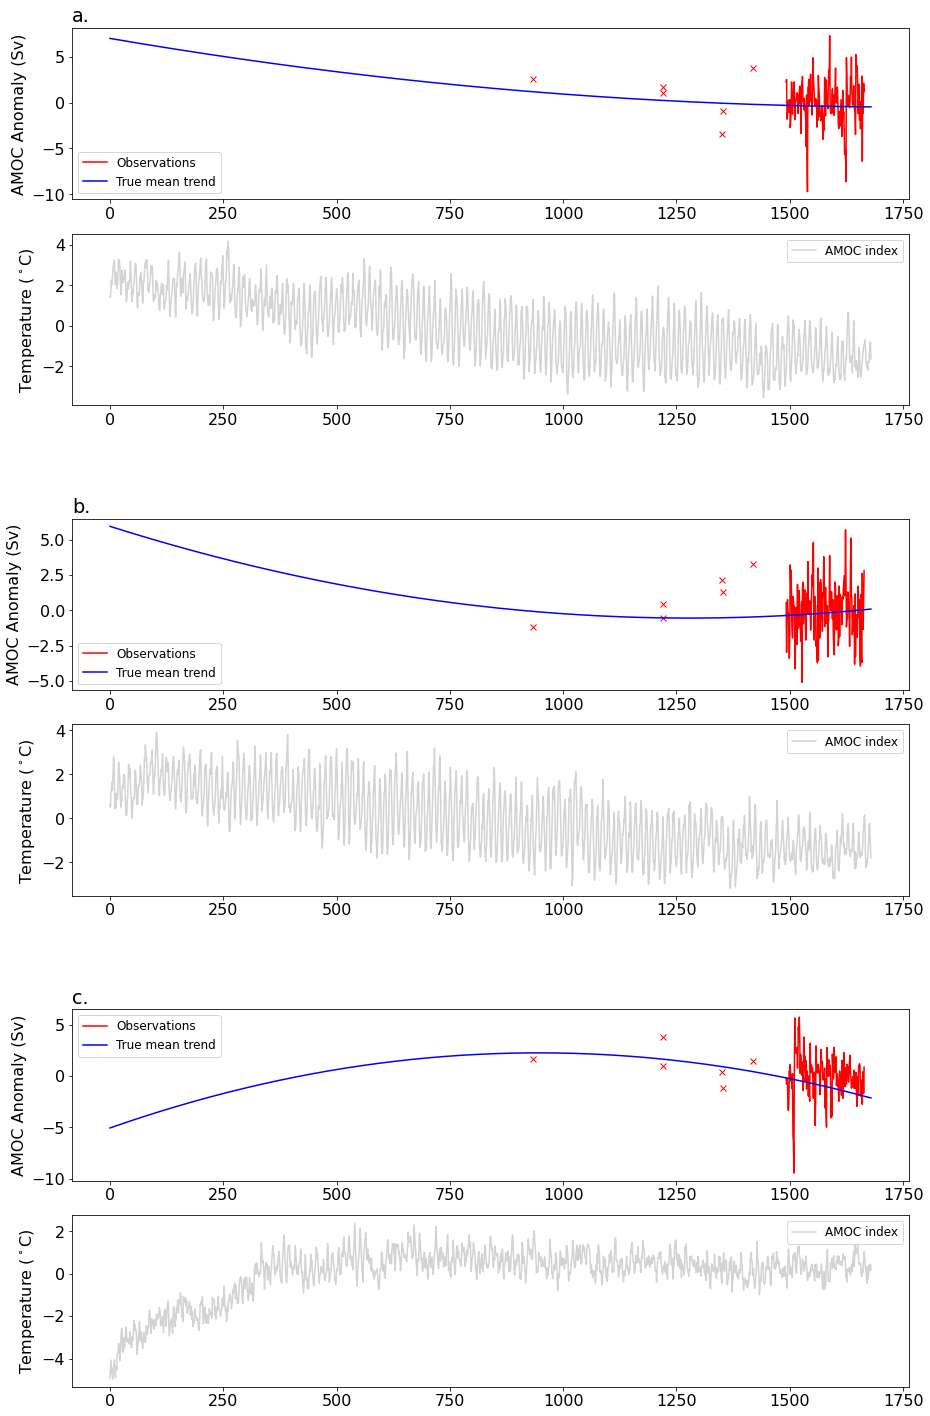

In [13]:
l = [0, 4000, 10000]
legend = ['a', 'b', 'c']

fig = plt.figure(figsize=(15, 25))
outer = gridspec.GridSpec(len(l), 1, hspace = 0.3)

for i, case in enumerate(l):
    test_pred_1000 = np.load(load_file + 'test_pred_' + str(case) + '.npy')
    AMOC_input_test = np.load(load_file + 'AMOC_input_test_' + str(case) + '.npy')
    AMOCindex_input_test = np.load(load_file + 'AMOCindex_input_test_' + str(case) + '.npy')
    target_test = np.load(load_file + 'target_test_' + str(case) + '.npy')
    
    test_pred_1000 = np.squeeze(test_pred_1000)
    AMOC_input_test = np.squeeze(AMOC_input_test)
    AMOCindex_input_test = np.squeeze(AMOCindex_input_test)
    target_test = np.squeeze(target_test)
    
    ### confidence interval ###
    test_pred_1000 = np.squeeze(test_pred_1000)
    mean = np.mean(test_pred_1000, axis=0)
    lower = np.quantile(test_pred_1000, 0.025, axis = 0)
    upper = np.quantile(test_pred_1000, 0.975, axis = 0)
#     std = np.std(test_pred_1000, axis=0)
#     ci = 1.96 * std
    x = np.linspace(1, test_pred_1000.shape[1], test_pred_1000.shape[1])
    
    mask = np.array(~AMOC_Obs['Obs'].isna())
    
    ax1 = plt.Subplot(fig, outer[i])
    fig.add_subplot(ax1)
    ax1.axis('off')
    ax1.set_title(legend[i]+'.', loc = 'left')
    
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], hspace=0.2)
    
    ax = fig.add_subplot(inner[0])
    for j in range(6):
        ax.plot(x[mask][j], AMOC_input_test[j], c='red', marker='x')
    ax.plot(x[mask][6:], AMOC_input_test[6:], c='red', label='Observations')
    ax.plot(target_test, c='blue', label='True mean trend')
    # ax.plot(mean, c='orange', label='Estimated mean trend')
    # ax.fill_between(x, lower, upper, color='navy', alpha=.2)
    ax.set_ylabel('AMOC Anomaly (Sv)')
    ax.legend()
    
    ax = fig.add_subplot(inner[1])
    ax.plot(AMOCindex_input_test, c='lightgray', label='AMOC index')
    ax.set_ylabel('Temperature ($^\circ$C)')
    ax.legend()
    
# fig.savefig(save_file + 'test_case_nopred.png', bbox_inches='tight')

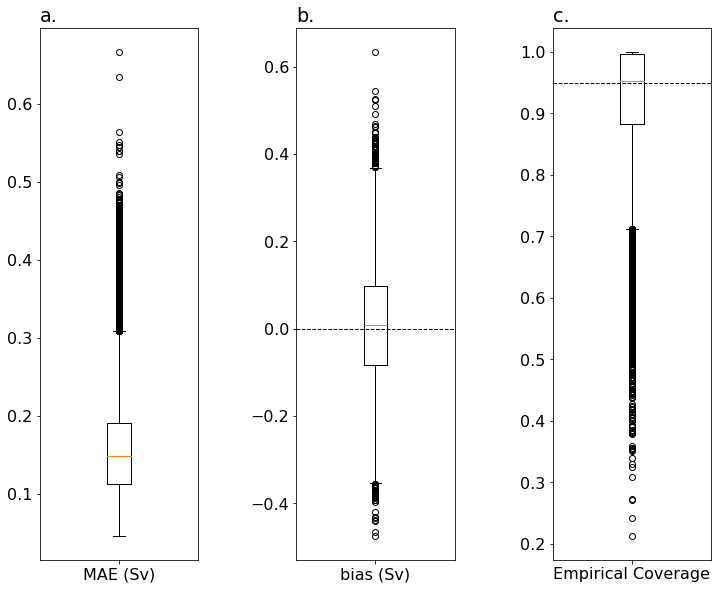

In [13]:
foo = plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.tight_layout(pad = 5)
bias = np.absolute(test_bias)
box_bias_mae = np.sum(bias, axis=1)/len(AMOC_Obs)
plt.boxplot(box_bias_mae, labels=['MAE (Sv)'])
plt.title('a.', loc = 'left')

plt.subplot(1, 3, 2)
box_bias = np.sum(test_bias, axis=1)/len(AMOC_Obs)
plt.boxplot(box_bias, labels=['bias (Sv)'])
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.title('b.', loc = 'left')

plt.subplot(1, 3, 3)
plt.boxplot(emp_prob, labels=['Empirical Coverage'])
plt.axhline(y=0.95, color='black', linestyle='--', lw=1)
plt.title('c.', loc = 'left')

plt.show()

# foo.savefig(save_file + 'bias_all.png', bbox_inches='tight')

In [14]:
# 5-number summary for empirical probability
print(np.percentile(emp_prob, [0, 25, 50, 75, 100]))

[0.21309524 0.8827381  0.95297619 0.99642857 1.        ]


In [15]:
# 5-number summary for MAE
print(np.percentile(box_bias_mae, [0, 25, 50, 75, 100]))

[0.0466944  0.11246138 0.1481979  0.1911682  0.66668603]


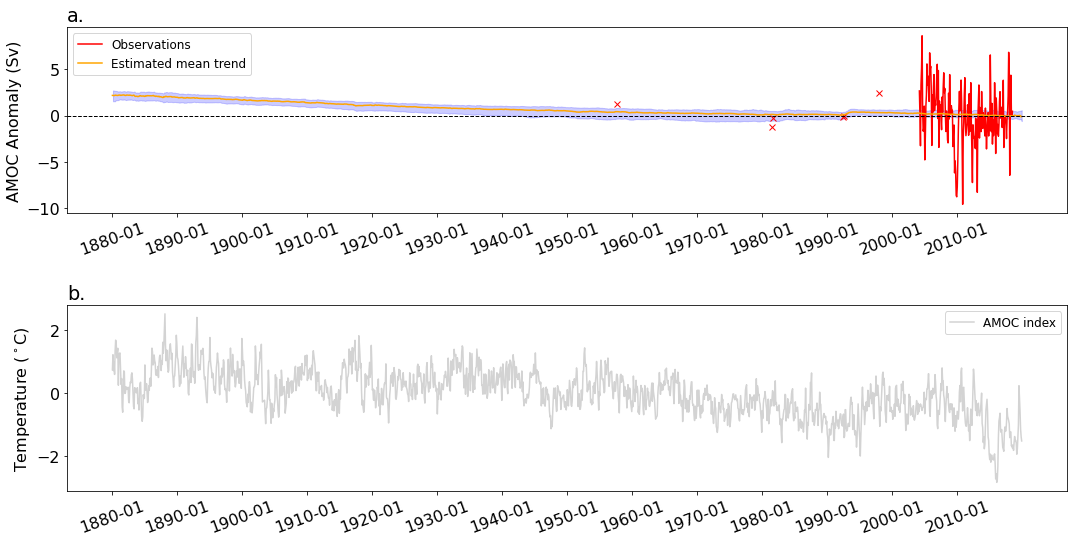

In [16]:
### Plot Obs data with confidence interval: AMOC and AMOC Index

### confidence interval ###
Obs_pred_1000 = np.squeeze(Obs_pred)
mean = np.mean(Obs_pred_1000, axis=0)
lower = np.quantile(Obs_pred_1000, 0.025, axis = 0)
upper = np.quantile(Obs_pred_1000, 0.975, axis = 0)
# std = np.std(Obs_pred_1000, axis=0)
# ci = 1.96 * std

# AMOC plot
foo = plt.figure(figsize=(15, 7))
plt.subplot(2, 1, 1)
plt.tight_layout()
for i in range(6):
    plt.plot(AMOC.index[i], AMOC.values[i], c='red', marker='x')
plt.plot(AMOC.index[6:], AMOC.values[6:], c='red', label='Observations')
plt.plot(mean, c='orange', label='Estimated mean trend')
plt.fill_between(np.linspace(1, len(AMOC_Obs), len(AMOC_Obs)), lower, upper, color='b', alpha=.2)
# xticks for every 10 years
xlocs=np.arange(0, len(AMOC_Obs), step=120)
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
# plt.xlim((0, len(AMOC_Obs)))
plt.axhline(y=0, color='black', linestyle='--', lw=1)
plt.ylabel('AMOC Anomaly (Sv)')
plt.title('a.', loc = 'left')
plt.legend()

# AMOC index plot
plt.subplot(2, 1, 2)
plt.plot(AMOC_index, c='lightgray', label='AMOC index')
plt.xticks(xlocs, AMOC_Obs['datetime'][xlocs], rotation=20)
# plt.xlim((0, len(AMOC_Obs)))
plt.ylabel('Temperature ($^\circ$C)')
plt.title('b.', loc = 'left')
plt.legend()

plt.subplots_adjust(hspace=0.5)

# foo.savefig(save_file + 'Obs_pred_para.png', bbox_inches='tight')

In [ ]:
# # AMOC Obs prediction KDE plots
# fig, ax = plt.subplots(2, 1, figsize=(9, 10))
# plt.tight_layout()

# ###############################################################
# plot_name = 'density1880_1950_2019.png'
# time = ['1880-01', '1950-01','2019-01']
# ###############################################################

# point = [np.where(AMOC_Obs['datetime'] == x)[0][0] for x in time]
# colors = ['red', 'darkorange', 'cornflowerblue']
# # bandwidth = [0.1, 0.08, 0.05]

# ##############################################################################################################################
# # Fit KDE with three selected time points.
# for a, color in zip(point, colors):
#     X_inp = Obs_pred[:, a, :]
    
#     params = {"bandwidth": np.logspace(-2, 0, 20)}
#     grid = GridSearchCV(KernelDensity(), params)
#     grid.fit(X_inp)
#     kde = grid.best_estimator_
#     print("best bandwidth: {0}".format(grid.best_estimator_.bandwidth))
    
#     # Compute the log-likelihood of each sample under the KDE model.
#     X_plot = np.linspace(np.min(X_inp)-0.5, np.max(X_inp)+0.5, 5000)[:, np.newaxis]
#     log_dens = kde.score_samples(X_plot)
    
#     position = AMOC_Obs['datetime'][a]
#     ax[0].plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=2,
#             linestyle='-', label="'{0}'".format(position))

# ax[0].legend(loc='upper right')
# # ax[0].set_xlim(-3.5, 4)
# # ax[0].set_xlim(-1, 3.5)
# ax[0].set_ylim(bottom=0)
# ax[0].set_xlabel('Mean AMOC Anomaly Relative to Observed Average [Strength (Sv)]')
# ax[0].set_title('a.', loc = 'left')

# ##############################################################################################################################
# # Fit KDE with the AMOC difference between start time point and end time point, show the probability of decreasing.
# X_inp = Obs_pred[:, point[-1], :] - Obs_pred[:, point[0], :]

# params = {"bandwidth": np.logspace(-2, 0, 20)}
# grid = GridSearchCV(KernelDensity(), params)
# grid.fit(X_inp)
# kde = grid.best_estimator_

# # Compute the log-likelihood of each sample under the KDE model.
# X_plot = np.linspace(np.min(X_inp)-0.5, np.max(X_inp)+0.5, 5000)[:, np.newaxis]
# log_dens = kde.score_samples(X_plot)

# ax[1].plot(X_plot[:, 0], np.exp(log_dens), color='red', lw=2,
#             linestyle='-', label=f'{time[-1]} - {time[0]}')
# ax[1].legend(loc='upper right')
# ax[1].set_ylim(bottom=0)
# ax[1].set_xlabel(r'$\Delta$ Mean AMOC [Strength (Sv)]')
# ax[1].set_title('b.', loc = 'left')

# ticks = np.arange(np.min(X_inp)-0.5, np.max(X_inp)+0.5, 0.5)
# labels = []
# for i in ticks:
#     pct = len(X_inp[X_inp < i])/len(X_inp)
#     labels.append(pct)
#     ax[1].axvline(i, color = 'black', linestyle = ':')

# ax2 = ax[1].secondary_xaxis('top')
# ax2.set_xlabel('Cumulative Probability')
# ax2.set_xticks(ticks, labels)

# plt.subplots_adjust(hspace=0.5)
# plt.show()

# # fig.savefig(save_file + plot_name, bbox_inches='tight')

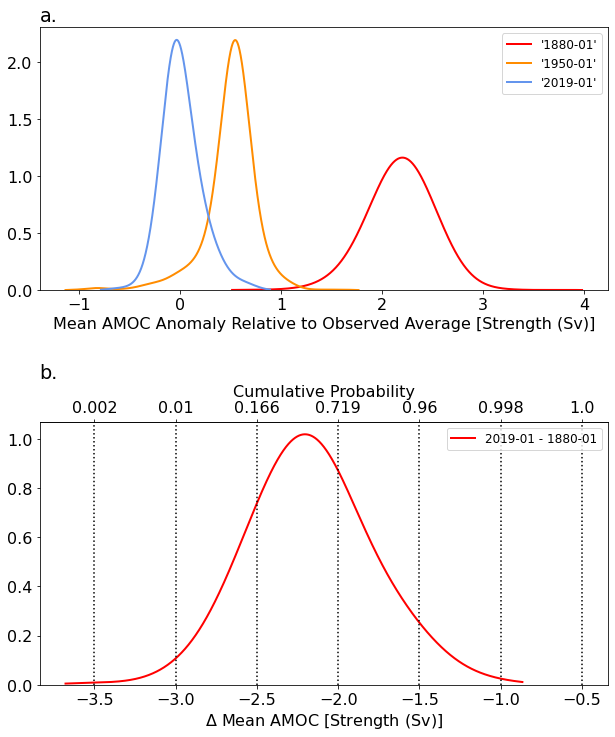

In [17]:
# AMOC Obs prediction KDE plots
fig, ax = plt.subplots(2, 1, figsize=(9, 10))
plt.tight_layout()

###############################################################
plot_name = 'density1880_1950_2019.png'
time = ['1880-01', '1950-01','2019-01']
###############################################################

point = [np.where(AMOC_Obs['datetime'] == x)[0][0] for x in time]
colors = ['red', 'darkorange', 'cornflowerblue']
# bandwidth = [0.144, 0.070, 0.043]
# bandwidth = [0.144, 0.070, 0.07]
bandwidth = [0.2, 0.1, 0.1]

##############################################################################################################################
# Fit KDE with three selected time points.
for a, color, w in zip(point, colors, bandwidth):
    X_inp = Obs_pred[:, a, :]
    
    kde = KernelDensity(bandwidth=w).fit(X_inp)
    
    # Compute the log-likelihood of each sample under the KDE model.
    X_plot = np.linspace(np.min(X_inp)-0.1, np.max(X_inp)+0.1, 5000)[:, np.newaxis]
    log_dens = kde.score_samples(X_plot)
    
    position = AMOC_Obs['datetime'][a]
    ax[0].plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=2,
            linestyle='-', label="'{0}'".format(position))

ax[0].legend(loc='upper right')
# ax[0].set_xlim(-3.5, 4)
# ax[0].set_xlim(-1, 4.0)
ax[0].set_ylim(bottom=0)
ax[0].set_xlabel('Mean AMOC Anomaly Relative to Observed Average [Strength (Sv)]')
ax[0].set_title('a.', loc = 'left')

##############################################################################################################################
# Fit KDE with the AMOC difference between start time point and end time point, show the probability of decreasing.
X_inp = Obs_pred[:, point[-1], :] - Obs_pred[:, point[0], :]

# bandwidth=0.085
kde = KernelDensity(bandwidth=0.2).fit(X_inp)

# Compute the log-likelihood of each sample under the KDE model.
X_plot = np.linspace(np.min(X_inp)-0.1, np.max(X_inp)+0.1, 5000)[:, np.newaxis]
log_dens = kde.score_samples(X_plot)

ax[1].plot(X_plot[:, 0], np.exp(log_dens), color='red', lw=2,
            linestyle='-', label=f'{time[-1]} - {time[0]}')
ax[1].legend(loc='upper right')
ax[1].set_ylim(bottom=0)
ax[1].set_xlabel(r'$\Delta$ Mean AMOC [Strength (Sv)]')
ax[1].set_title('b.', loc = 'left')

ticks = np.arange(int(np.min(X_inp))-0.5, int(np.max(X_inp)), 0.5)
labels = []
for i in ticks:
    pct = len(X_inp[X_inp < i])/len(X_inp)
    labels.append(pct)
    ax[1].axvline(i, color = 'black', linestyle = ':')

ax2 = ax[1].secondary_xaxis('top')
ax2.set_xlabel('Cumulative Probability')
ax2.set_xticks(ticks, labels)
# ax[0].set_xlim(-1, 4.0)

plt.subplots_adjust(hspace=0.5)
plt.show()

# fig.savefig(save_file + plot_name, bbox_inches='tight')

In [19]:
# Calculate credible interval for $\Delta$ Mean AMOC with qunatile estimation
# l = 0.95
# mean = np.mean(X_inp)
# std = np.std(X_inp)
# z = norm.ppf(1-(1-l)/2)

# lower = mean - z * std / np.sqrt(1000)
# upper = mean + z * std / np.sqrt(1000)
X_inp = Obs_pred[:, point[-1], :] - Obs_pred[:, point[0], :]

l = 0.99
lower_q = (1-l)/2
upper_q = 1-(1-l)/2

lower = np.quantile(X_inp, lower_q)
upper = np.quantile(X_inp, upper_q)

print(f"The {l*100}% credible interval is:", lower, upper)

The 99.0% credible interval is: -3.0591149044036863 -1.13877329826355


In [18]:
np.mean(Obs_pred[:, point[-1], :]) - np.mean(Obs_pred[:, point[0], :])

-2.17114479637146

In [ ]:
# # Future AMOC prediction plots

# ################################################################################
# ##Data preprocessing############################################################

# ###############################################################
# ###############################################################
# if AMOC_range == 140:
#     key_time = (1880, 1919, 1975, 2014, 2060, 2099)
# elif AMOC_range == 70:
#     key_time = (1950, 1979, 1985, 2014, 2070, 2099)
# else:
#     print('Need to define key time range')
# ###############################################################
# ###############################################################

# # X: current century AMOC data from 12 CMIP6 models
# X = {'Time': list(range(1850, 2015))}

# for i in range(1, 13):
#     words = ['input_data/AMOC_21C/M', str(i), '_1850_2014_pp_Annual_AMOChistoricalmax265_clim.txt']
#     file = ''.join(words)
#     a = np.loadtxt(file)
#     X[i] = a

# X = pd.DataFrame(X)

# # Y: future century AMOC data from 12 CMIP6 models
# Y = {'Time': list(range(2015, 2101))}

# for i in range(1, 13):
#     words = ['input_data/AMOC_21C/M', str(i), '_2015_2100_pp_Annual_AMOCssp585max265_clim.txt']
#     file = ''.join(words)
#     a = np.loadtxt(file)
#     Y[i] = a

# Y = pd.DataFrame(Y)

# # Get current century AMOC diff and future century AMOC diff
# mean_1 = X[(X['Time'] >= key_time[0]) & (X['Time'] <= key_time[1])].mean(axis=0)[1:13]
# mean_2 = X[(X['Time'] >= key_time[2]) & (X['Time'] <= key_time[3])].mean(axis=0)[1:13]
# mean_3 = Y[(Y['Time'] >= key_time[4]) & (Y['Time'] <= key_time[5])].mean(axis=0)[1:13]

# # delta_X: current century AMOC diff, delta_Y: future century AMOC diff
# delta_X = np.array(mean_2 - mean_1).reshape((-1, 1))
# delta_Y = np.array(mean_3 - mean_2).reshape((-1, 1))

In [ ]:
# # Gaussian Mixture Fitting
# n_components = 3

# X = np.concatenate((delta_X, delta_Y), axis=1, dtype='float')
# gm = GaussianMixture(n_components=n_components, random_state=0).fit(X) # X: (n_samples, n_features)

In [ ]:
# print('If convergence of the best fit of EM was reached:', gm.converged_)

In [ ]:
# def conditional_mean(mean_vector, covariance_matrix, indices_X, indices_Y, x_values):
#     """
#     Computes the conditional mean E[Y | X = x] for a multivariate Gaussian distribution.

#     Parameters:
#     - mean_vector: The mean vector of the multivariate Gaussian distribution.
#     - covariance_matrix: The covariance matrix of the multivariate Gaussian distribution.
#     - indices_X: Indices of the variables that are observed (X).
#     - indices_Y: Indices of the variables to compute the conditional mean for (Y).
#     - x_values: The observed values of X. (n_features, n_samples)

#     Returns:
#     - mu_Y_given_X: The conditional mean E[Y | X = x]. (n_features, n_samples)
#     """

#     # Ensure inputs are numpy arrays
#     mean_vector = np.array(mean_vector)
#     covariance_matrix = np.array(covariance_matrix)
#     indices_X = np.array(indices_X)
#     indices_Y = np.array(indices_Y)
#     x_values = np.array(x_values)

#     # Extract mean vectors for X and Y
#     mu_X = mean_vector[indices_X]
#     mu_Y = mean_vector[indices_Y]

#     # Extract covariance submatrices
#     Sigma_XX = covariance_matrix[np.ix_(indices_X, indices_X)]
#     Sigma_XY = covariance_matrix[np.ix_(indices_X, indices_Y)]
#     Sigma_YX = covariance_matrix[np.ix_(indices_Y, indices_X)]
#     Sigma_YY = covariance_matrix[np.ix_(indices_Y, indices_Y)]

#     # Compute the inverse of Sigma_XX
#     Sigma_XX_inv = np.linalg.inv(Sigma_XX)
    
#     # Compute the conditional mean: (1, n) = (1, 1) + (1, p) @ (p, p) @ ((p, n) - (p, 1))
#     mu_Y_given_X = mu_Y + Sigma_YX @ Sigma_XX_inv @ (x_values - mu_X)

#     return mu_Y_given_X

In [ ]:
# def conditional_z(gm_weights, gm_mean_matrix, gm_covariance_matrix, indices_X, indices_Y, x_values):
#     """
#     Computes the conditional probability P[Z | X = x] for a Gaussian Mixture.

#     Parameters:
#     - gm_weights: The weights of each mixture components. (n_components,)
#     - gm_mean_matrix: The mean of each mixture component. (n_components, n_features)
#     - gm_covariance_matrix: The covariance of each mixture component. (n_components, n_features, n_features)
#     - indices_X: Indices of the variables that are conditioned (X).
#     - indices_Y: Indices of the variables to be marginalized (Y).
#     - x_values: The observed values of X. (n_features, n_samples)

#     Returns:
#     - prob_Z_given_X: The conditional probability P[Z | X = x]. (n_components, n_samples)
#     """

#     # Ensure inputs are numpy arrays
#     gm_weights = np.array(gm_weights)
#     gm_mean_matrix = np.array(gm_mean_matrix)
#     gm_covariance_matrix = np.array(gm_covariance_matrix)
#     indices_X = np.array(indices_X)
#     indices_Y = np.array(indices_Y)
#     x_values = np.array(x_values)

#     # Extract mean vectors for each mixture components X
#     mu = gm_mean_matrix[:, indices_X]

#     # Extract covariance submatrices for each mixture components X
#     Sigma = np.diagonal(gm_covariance_matrix, axis1=1, axis2=2)[:, indices_X]
    
#     # Calculate P[X | Z]
#     prob_X_given_Z = []
#     for i in range(len(gm_weights)):
#         # multivariate_normal: input need format (n_samples, n_features)
#         prob = multivariate_normal.pdf(x_values.T, mean=mu[i], cov=Sigma[i])
#         prob_X_given_Z.append(prob)
#     prob_X_given_Z = np.stack(prob_X_given_Z, axis = 0)    
    
#     # Calculate P[X] = P[X | Z = z_0] * P[Z = z_0] + P[X | Z = z_1] * P[Z = z_1] + ...
#     prob_X = gm_weights[:, np.newaxis].T @ prob_X_given_Z 
    
#     # Calculate P[Z = z_i | X] = P[X | Z = z_i] * P[Z = z_i] / P[X]
#     prob_Z_given_X = gm_weights[:, np.newaxis] * prob_X_given_Z / prob_X
    
#     assert np.all(np.absolute(np.sum(prob_Z_given_X, axis = 0) - 1) < 1e-3)

#     return prob_Z_given_X

In [ ]:
# # Observation input current century data: aggregate into yearly mean
# num_years = int(Obs_pred.shape[1] / 12)
# Obs_pred_yearly = np.zeros(shape=(1000, num_years))

# for i in range(num_years):
#     Obs_pred_yearly[:, i] = np.mean(Obs_pred[:, i*12:(i+1)*12, 0], axis=1)

# Obs_pred_yearly = np.reshape(np.ravel(Obs_pred_yearly, order='C'), (num_years, 1000), order='F')

# Obs = pd.DataFrame(Obs_pred_yearly)
# Obs.insert(0, 'Time', list(range(2020-num_years, 2020)))

# ################################################################################
# # get prediction for 1000 trails Observation data
# mean_1_Obs = Obs[(Obs['Time'] >= key_time[0]) & (Obs['Time'] <= key_time[1])].mean(axis=0)[1:1001]
# mean_2_Obs = Obs[(Obs['Time'] >= key_time[2]) & (Obs['Time'] <= key_time[3])].mean(axis=0)[1:1001]
# Obs_inp = np.array(mean_2_Obs - mean_1_Obs)
# Obs_inp = Obs_inp[np.newaxis, :]
# print(Obs_inp.shape)

In [ ]:
# # current century gaussian density estimation
# params = {"bandwidth": np.logspace(-2, 0, 20)}
# grid = GridSearchCV(KernelDensity(), params)
# # KDE input: (n_samples, n_features)
# grid.fit(Obs_inp.T)
# kde_inp = grid.best_estimator_

# # Compute the log-likelihood of each sample under the KDE model.
# x_Obs_inp = np.linspace(np.min(Obs_inp)-0.5, np.max(Obs_inp)+0.5, 5000)[:, np.newaxis]
# log_dens_x_inp = kde_inp.score_samples(x_Obs_inp)[:, np.newaxis]

# # find the position for axvline and axhline
# a = np.where(log_dens_x_inp == np.max(log_dens_x_inp))

# # find plots xlim
# x_min = min(np.min(delta_X), np.min(Obs_inp))
# x_max = max(np.max(delta_X), np.max(Obs_inp))

In [ ]:
# indices_X = [0]
# indices_Y = [1]

# p_z_given_x = conditional_z(gm.weights_, gm.means_, gm.covariances_, indices_X, indices_Y, Obs_inp) # (n_components, n_samples)

# # generate index for if this data belongs to component_0
# np.random.seed(seed = 1000)
# uniform_sample = np.random.random_sample(p_z_given_x[[0]].shape) # (1, n_samples)
# cum_prob = np.cumsum(p_z_given_x, axis=0)

# Obs_out = np.nan * np.ones_like(Obs_inp) # (1, n_samples)
# range_list = []
# for i in range(n_components):
#     mean_vector = gm.means_[i]
#     covariance_matrix = gm.covariances_[i]
    
#     out = conditional_mean(mean_vector, covariance_matrix, indices_X, indices_Y, Obs_inp) # (1, n_samples)
    
#     if i == 0:
#         lower = 0
#     else:
#         lower = cum_prob[[i-1]]
#     upper = cum_prob[[i]]
#     index = np.where(((uniform_sample >= lower) & (uniform_sample < upper)))

#     Obs_out[index] = out[index]
    
#     if out[index].size:
#         range_list.append([np.min(out[index]), np.max(out[index])])
#     else:
#         range_list.append(None)
#     print(f'size for cluster {i}:', out[index].size)

# print('Obs_out shape:', Obs_out.shape)

# # find plots ylim
# y_min = min(np.min(delta_Y), np.min(Obs_out))
# y_max = max(np.max(delta_Y), np.max(Obs_out))

In [ ]:
# params = {"bandwidth": np.logspace(-2, 0, 20)}
# grid = GridSearchCV(KernelDensity(), params)
# grid.fit(Obs_out.T)
# kde_out = grid.best_estimator_

# # Compute the log-likelihood of each sample under the KDE model.
# x_Obs_out = np.linspace(np.min(Obs_out)-0.5, np.max(Obs_out)+0.5, 5000)[:, np.newaxis]
# log_dens_x_out = kde_out.score_samples(x_Obs_out)[:, np.newaxis]

In [ ]:
# # find the position for axvline and axhline
# b = []
# for i in range(n_components):
#     # Find density peak for each components
#     if range_list[i]:
#         condition = np.where((x_Obs_out >= range_list[i][0] - np.ptp(x_Obs_out)/5000) & (x_Obs_out <= range_list[i][1] + np.ptp(x_Obs_out)/5000))
#         loc = np.where(log_dens_x_out == np.max(log_dens_x_out[condition]))
#         b.append(loc)
#     else:
#         b.append(None)

In [ ]:
# ################################################################################
# ## plot#########################################################################
# # fig, axes = plt.subplots(2, 3, figsize=(16, 14), width_ratios=[1, 1, 0.05])
# # plt.tight_layout()
# fig = plt.figure(figsize=(16, 16))
# axes = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 0.05])

# # dump (1, 1) plot
# # axes[-1, -1].axis('off')

# ax = plt.subplot(axes[0, 0])
# # colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
# #           '#9acd32', '#ffbc14']
# # for i, color in enumerate(colors):
# #     ax.text(delta_X[i], delta_Y[i], i+1, c=color, fontsize = 16)
# # #     ax.scatter(delta_X[i], delta_Y[i], c=color)

# for i in range(len(delta_X)):
#     ax.text(delta_X[i], delta_Y[i], i+1, fontsize = 16)
# # ax.plot(x, y_pred, color='black', linewidth=0.5)

# ax.axvline(x=x_Obs_inp[a], linestyle='--')
# for i in range(n_components):
#     if b[i]:
#         ax.axhline(y=x_Obs_out[b[i]], linestyle='--')

# ax.set_xlim((x_min-0.5, x_max+0.5))
# ax.set_ylim((y_min-0.5, y_max+0.5))
# # legend = ax.legend(*scatter.legend_elements(num=12),
# #                     loc="upper left")
# # ax.add_artist(legend)


# # display predicted scores by the model as a contour plot
# x = np.linspace(x_min-0.5, x_max+0.5)
# y = np.linspace(y_min-0.5, y_max+0.5)
# X, Y = np.meshgrid(x, y)
# XX = np.array([X.ravel(), Y.ravel()]).T
# Z = gm.score_samples(XX)
# Z = Z.reshape(X.shape)

# im = ax.contourf(
#     X, Y, Z, 50, cmap=plt.cm.bone
# )

# ax.set_xlabel(f'$\Delta$AMOC {key_time[0]}-{key_time[1]} to {key_time[2]}-{key_time[3]} (Sv)')
# ax.set_ylabel(f'$\Delta$AMOC {key_time[2]}-{key_time[3]} to {key_time[4]}-{key_time[5]} (Sv)')
# ax.set_title('a.', loc = 'left')

# ###################################################################################################
# ax = plt.subplot(axes[0, 1])
# ax.plot(np.exp(log_dens_x_out), x_Obs_out, color='red', lw=1,
#             linestyle='-')
# ax.hist(np.squeeze(Obs_out), density=True, bins='auto', color='#add8e6', orientation='horizontal')

# for i in range(n_components):
#     if b[i]:
#         ax.axhline(y=x_Obs_out[b[i]], linestyle='--')

# ax.set_ylim((y_min-0.5, y_max+0.5))
# ax.yaxis.set_label_position("right")
# ax.set_ylabel(f'$\Delta$AMOC long-term trend {key_time[2]}-{key_time[3]} to {key_time[4]}-{key_time[5]} (Sv)')
# ax.set_title('b.', loc = 'left')

# ###################################################################################################
# ax = plt.subplot(axes[1, 0])
# ax.plot(x_Obs_inp, np.exp(log_dens_x_inp), color='red', lw=1,
#             linestyle='-')
# ax.hist(np.squeeze(Obs_inp), density=True, bins='auto', color='#add8e6')
# ax.axvline(x=x_Obs_inp[a], linestyle='--')
# ax.set_xlim((x_min-0.5, x_max+0.5))
# ax.set_xlabel(f'$\Delta$AMOC long-term trend {key_time[0]}-{key_time[1]} to {key_time[2]}-{key_time[3]} (Sv)')
# ax.set_title('c.', loc = 'left')

# fig.colorbar(im, cax = plt.subplot(axes[0, 2]))

# plt.subplots_adjust(hspace=0.2)
# plt.subplots_adjust(wspace=0.2)
# plt.show()

# # fig.savefig(save_file + 'AMOC_pred_40y.png', bbox_inches='tight')

In [ ]:
# gm.means_

In [ ]:
# ################################################################################
# # fit linear regression for 12 different CMIP6 models
# # use 40 years average of AMOC difference at the start and the end of century
# # to represent how AMOC change in one century

# lr = linear_model.LinearRegression()
# lr.fit(delta_X, delta_Y)

# x = np.linspace(-2.0, 2, 400).reshape((-1,1))
# y_pred = lr.predict(x)

In [22]:
###############################################################################
####original future century AMOC prediction plots code#########################
###############################################################################


# Future AMOC prediction plots

################################################################################
##Data preprocessing############################################################

###############################################################
###############################################################
if AMOC_range == 140:
    key_time = (1880, 1919, 1975, 2014, 2060, 2099)
elif AMOC_range == 70:
    key_time = (1950, 1979, 1985, 2014, 2070, 2099)
else:
    print('Need to define key time range')
###############################################################
###############################################################

# X: current century AMOC data from 12 CMIP6 models
X = {'Time': list(range(1850, 2015))}

for i in range(1, 13):
    words = ['input_data/AMOC_21C/M', str(i), '_1850_2014_pp_Annual_AMOChistoricalmax265_clim.txt']
    file = ''.join(words)
    a = np.loadtxt(file)
    X[i] = a

X = pd.DataFrame(X)

# Y: future century AMOC data from 12 CMIP6 models
Y = {'Time': list(range(2015, 2101))}

for i in range(1, 13):
    words = ['input_data/AMOC_21C/M', str(i), '_2015_2100_pp_Annual_AMOCssp585max265_clim.txt']
    file = ''.join(words)
    a = np.loadtxt(file)
    Y[i] = a

Y = pd.DataFrame(Y)

# Get current century AMOC diff and future century AMOC diff
mean_1 = X[(X['Time'] >= key_time[0]) & (X['Time'] <= key_time[1])].mean(axis=0)[1:13]
mean_2 = X[(X['Time'] >= key_time[2]) & (X['Time'] <= key_time[3])].mean(axis=0)[1:13]
mean_3 = Y[(Y['Time'] >= key_time[4]) & (Y['Time'] <= key_time[5])].mean(axis=0)[1:13]

# delta_X: current century AMOC diff, delta_Y: future century AMOC diff
delta_X = np.array(mean_2 - mean_1).reshape((-1, 1))
delta_Y = np.array(mean_3 - mean_2).reshape((-1, 1))

lr = linear_model.LinearRegression()
lr.fit(delta_X, delta_Y)

# data to draw lr line
x = np.linspace(-2, 1.5, 500).reshape((-1,1))
y_pred = lr.predict(x)
################################################################################
# get prediction for 1000 trails Observation data, 40 years average
# Observation input current century data: aggregate into yearly mean
num_years = int(Obs_pred.shape[1] / 12)
Obs_pred_yearly = np.zeros(shape=(1000, num_years))

for i in range(num_years):
    Obs_pred_yearly[:, i] = np.mean(Obs_pred[:, i*12:(i+1)*12, 0], axis=1)

Obs_pred_yearly = np.reshape(np.ravel(Obs_pred_yearly, order='C'), (num_years, 1000), order='F')

Obs = pd.DataFrame(Obs_pred_yearly)
Obs.insert(0, 'Time', list(range(2020-num_years, 2020)))

################################################################################
# current century gaussian density estimation
mean_1_Obs = Obs[(Obs['Time'] >= key_time[0]) & (Obs['Time'] <= key_time[1])].mean(axis=0)[1:1001]
mean_2_Obs = Obs[(Obs['Time'] >= key_time[2]) & (Obs['Time'] <= key_time[3])].mean(axis=0)[1:1001]
Obs_inp = np.array(mean_2_Obs - mean_1_Obs)
Obs_inp = Obs_inp[:, np.newaxis]
# print(Obs_inp.shape)

# bandwidth = 0.0886
kde_inp = KernelDensity(bandwidth=0.0886).fit(Obs_inp)

# Compute the log-likelihood of each sample under the KDE model.
x_Obs_inp = np.linspace(np.min(Obs_inp)-0.1, np.max(Obs_inp)+0.1, 5000)[:, np.newaxis]
log_dens_x_inp = kde_inp.score_samples(x_Obs_inp)[:, np.newaxis]

# find the position for axvline and axhline
a = np.where(log_dens_x_inp == np.max(log_dens_x_inp))

# find plots xlim
x_min = min(np.min(delta_X), np.min(Obs_inp))
x_max = max(np.max(delta_X), np.max(Obs_inp))

################################################################################
Obs_out = lr.predict(Obs_inp)
# future century gaussian density estimation
kde_out = KernelDensity(bandwidth=0.0886).fit(Obs_out)

# Compute the log-likelihood of each sample under the KDE model.
x_Obs_out = np.linspace(np.min(Obs_out)-0.1, np.max(Obs_out)+0.1, 5000)[:, np.newaxis]
log_dens_x_out = kde_out.score_samples(x_Obs_out)[:, np.newaxis]

# find the position for axvline and axhline
b = np.where(log_dens_x_out == np.max(log_dens_x_out))
#856
#4179

# set plots ylim
y_min = min(np.min(delta_Y), np.min(Obs_out))
y_max = max(np.max(delta_Y), np.max(Obs_out))

In [ ]:
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm
# from scipy import stats

# # delta_X: current century AMOC diff, delta_Y: future century AMOC diff
# delta_X = np.array(mean_2 - mean_1).reshape((-1, 1))
# delta_Y = np.array(mean_3 - mean_2).reshape((-1, 1))

# # lr = linear_model.LinearRegression()
# # lr.fit(delta_X, delta_Y)
# X_all = sm.add_constant(delta_X)
# est = sm.OLS(delta_Y, X_all)
# est2 = est.fit()
# print(est2.summary())

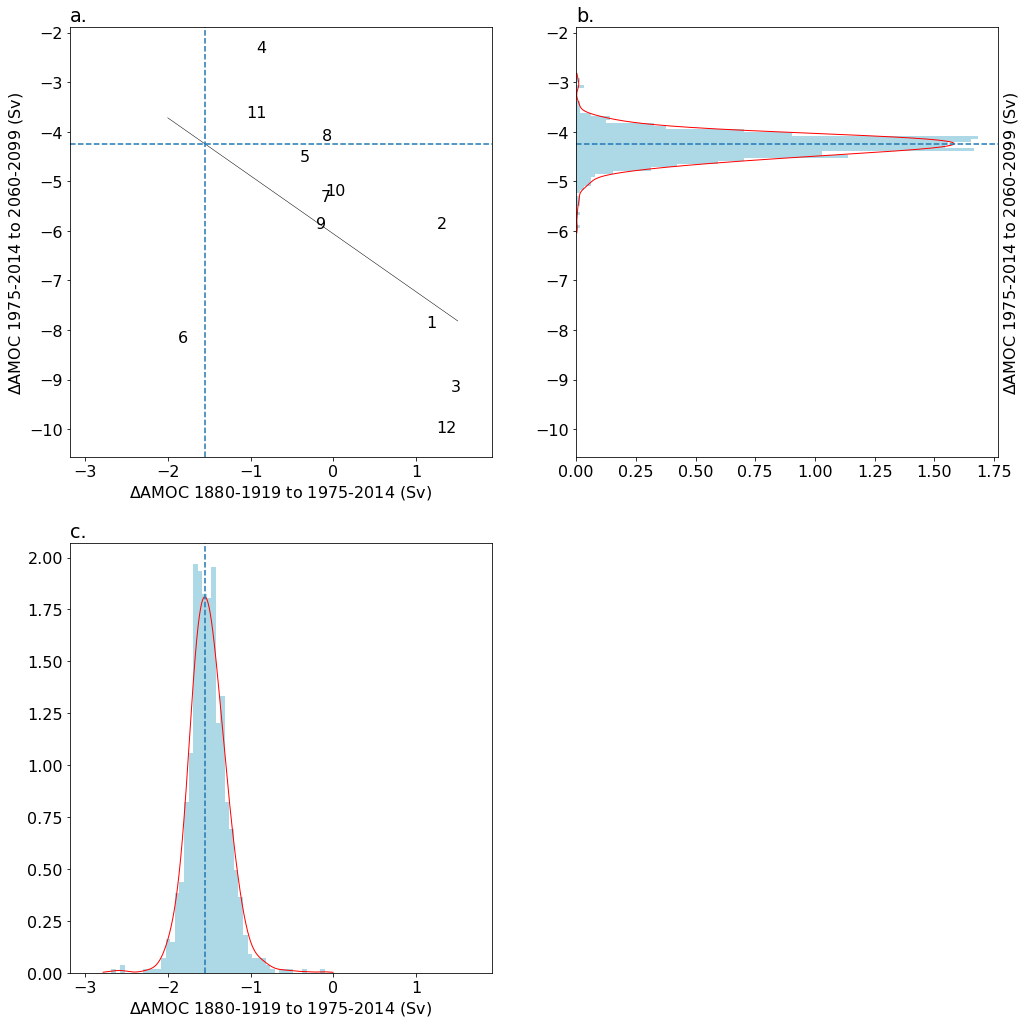

In [23]:
################################################################################
## plot
fig, axes = plt.subplots(2, 2, figsize=(14, 14))
plt.tight_layout()

# dump (1, 1) plot
axes[-1, -1].axis('off')

ax = axes[0][0]
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
#           '#9acd32', '#ffbc14']
# for i, color in enumerate(colors):
#     ax.text(delta_X[i], delta_Y[i], i+1, c=color, fontsize = 16)
# #     ax.scatter(delta_X[i], delta_Y[i], c=color)

for i in range(len(delta_X)):
    ax.text(delta_X[i], delta_Y[i], i+1, fontsize = 16)
ax.plot(x, y_pred, color='black', linewidth=0.5)
ax.axvline(x=x_Obs_inp[a], linestyle='--')
ax.axhline(y=x_Obs_out[b], linestyle='--')
ax.set_xlim((x_min-0.5, x_max+0.5))
ax.set_ylim((y_min-0.5, y_max+0.5))
# legend = ax.legend(*scatter.legend_elements(num=12),
#                     loc="upper left")
# ax.add_artist(legend)
ax.set_xlabel(f'$\Delta$AMOC {key_time[0]}-{key_time[1]} to {key_time[2]}-{key_time[3]} (Sv)')
ax.set_ylabel(f'$\Delta$AMOC {key_time[2]}-{key_time[3]} to {key_time[4]}-{key_time[5]} (Sv)')
ax.set_title('a.', loc = 'left')

ax = axes[0][1]
ax.plot(np.exp(log_dens_x_out), x_Obs_out, color='red', lw=1,
            linestyle='-')
ax.hist(Obs_out, density=True, bins='auto', color='#add8e6', orientation='horizontal')
ax.axhline(y=x_Obs_out[b], linestyle='--')
ax.set_ylim((y_min-0.5, y_max+0.5))
ax.yaxis.set_label_position("right")
ax.set_ylabel(f'$\Delta$AMOC {key_time[2]}-{key_time[3]} to {key_time[4]}-{key_time[5]} (Sv)')
ax.set_title('b.', loc = 'left')

ax = axes[1][0]
ax.plot(x_Obs_inp, np.exp(log_dens_x_inp), color='red', lw=1,
            linestyle='-')
ax.hist(Obs_inp, density=True, bins='auto', color='#add8e6')
ax.axvline(x=x_Obs_inp[a], linestyle='--')
ax.set_xlim((x_min-0.5, x_max+0.5))
ax.set_xlabel(f'$\Delta$AMOC {key_time[0]}-{key_time[1]} to {key_time[2]}-{key_time[3]} (Sv)')
ax.set_title('c.', loc = 'left')

plt.subplots_adjust(hspace=0.2)
plt.subplots_adjust(wspace=0.2)
plt.show()

# fig.savefig(save_file + 'AMOC_pred_40y.png', bbox_inches='tight')

In [24]:
# Calculate credible interval for future $\Delta$ Mean AMOC with qunatile estimation
l = 0.95
lower_q = (1-l)/2
upper_q = 1-(1-l)/2

lower = np.quantile(Obs_out, lower_q)
upper = np.quantile(Obs_out, upper_q)

print(f"The {l*100}% credible interval is:", lower, upper)

The 95.0% credible interval is: -4.844598841319918 -3.79330380352876
